In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/final_dataset_feature_engineered_v2.csv')

In [3]:
df.sample(4)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
29,flat,shree vardhman victoria,sector 70,1.15,8518.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,...,1350.0,NaN,NaN,1,0,0,0,1,0,49
2827,flat,tata primanti,sector 72,3.30,15384.0,2145.0,Super Built up area 2145(199.28 sq.m.)Built Up...,3,3,3+,...,2145.0,2000.0,1800.0,0,0,0,1,0,2,165
352,house,independent,sector 38,3.90,21242.0,1836.0,Plot area 204(170.57 sq.m.),6,6,3+,...,NaN,1836.0,NaN,1,1,0,1,0,0,32
805,flat,tulip ivory,sector 70,2.35,9791.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4,4,3+,...,NaN,NaN,2400.0,0,0,0,1,0,2,65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3803 non-null   object 
 1   society             3802 non-null   object 
 2   sector              3803 non-null   object 
 3   price               3785 non-null   float64
 4   price_per_sqft      3785 non-null   float64
 5   area                3785 non-null   float64
 6   areaWithType        3803 non-null   object 
 7   bedRoom             3803 non-null   int64  
 8   bathroom            3803 non-null   int64  
 9   balcony             3803 non-null   object 
 10  floorNum            3784 non-null   float64
 11  facing              2698 non-null   object 
 12  agePossession       3803 non-null   object 
 13  property_id         3803 non-null   object 
 14  super_builtup_area  1915 non-null   float64
 15  builtup_area        1733 non-null   float64
 16  carpet

In [5]:
df.duplicated().sum()

np.int64(125)

In [6]:
# there are duplicates in the dataset, dropping them because they generate biasness in data
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(3678, 24)

### property_type

whenever dealing with categorical column, try to determine the distribution of data among categories

<Axes: xlabel='property_type'>

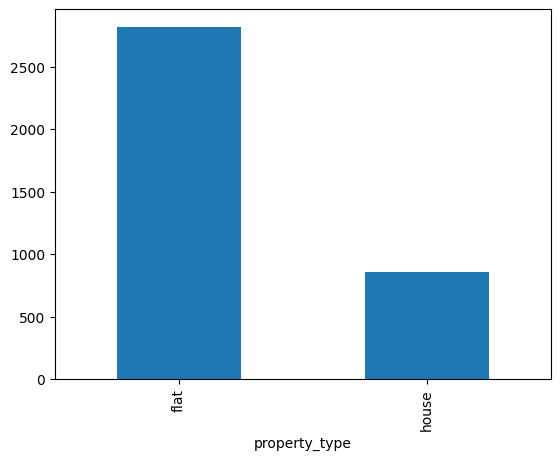

In [8]:
df['property_type'].value_counts().plot(kind='bar')

**Observation**  
distribution shows count of flats (75%) are far greater than independent houses (25%)

### Society

In [9]:
df['society'].value_counts() # has many unique values (676)

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
grover homes sec 4                        1
bhim nagar, sector 6                      1
on request                                1
landmark house                            1
parkwood westend                          1
Name: count, Length: 676, dtype: int64

from  676, 486 are independent houses then if we look at top 75 societies then 50% of the data is covered

In [10]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(74)

society
tulip violet                            0.023504
ss the leaf                             0.046380
shapoorji pallonji joyville gurugram    0.059542
dlf new town heights                    0.072704
signature global park                   0.083673
                                          ...   
umang winter hills                      0.486368
ansal heights 86                        0.490442
puri emerald bay                        0.494516
the close north                         0.498590
central park flower valley              0.502350
Name: proportion, Length: 74, dtype: float64

In [11]:
# performing binning on society col, can't think of anything else. Binning based on flat count
society_counts = df['society'].value_counts()

frequency_dist = {
    "Very High (>100)" : (society_counts > 100).sum(),
    "High (50-100)" : ((society_counts <= 100) & (society_counts >= 50)).sum(),
    "Average (10-49)" : ((society_counts < 50) & (society_counts >= 10)).sum(),
    "Low (1-9)" : ((society_counts < 10) & (society_counts > 1)).sum(),
    "Very Low (1)" : (society_counts == 1).sum()
}

frequency_dist

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (1-9)': np.int64(273),
 'Very Low (1)': np.int64(308)}

<Axes: xlabel='society'>

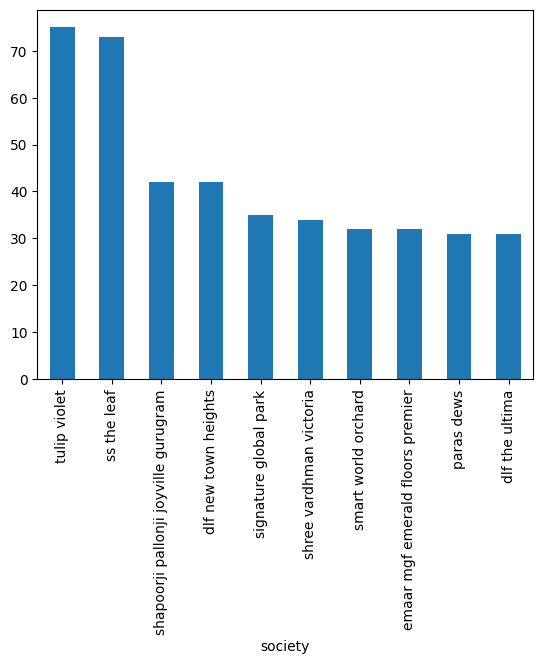

In [12]:
# top 10 societies
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

**Observations**
- 13% are independent houses
- 675 total societies
- 1 missing value

### sector

In [13]:
df['sector'].value_counts().shape

(115,)

<Axes: xlabel='sector'>

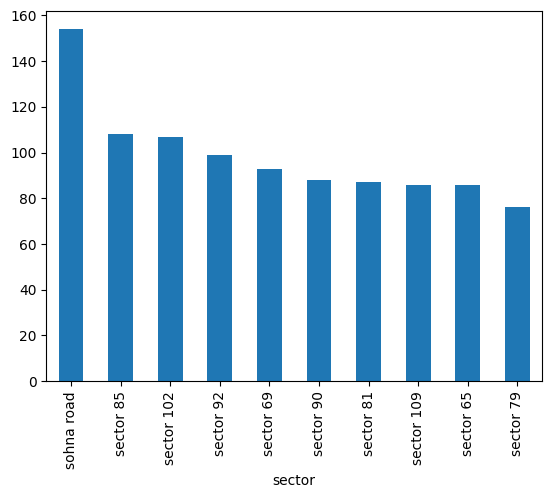

In [14]:
# top sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [15]:
# sectors frequency distribution
sector_counts = df['sector'].value_counts()

sector_frequency_dist = {
    "Very High (>100)" : (sector_counts > 100).sum(),
    "High (50-100)" : ((sector_counts <= 100) & (sector_counts >= 50)).sum(),
    "Average (10-49)" : ((sector_counts < 50) & (sector_counts >= 10)).sum(),
    "Low (1-9)" : ((sector_counts < 10) & (sector_counts > 1)).sum(),
    "Very Low (1)" : (sector_counts == 1).sum()
}

sector_frequency_dist

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(62),
 'Low (1-9)': np.int64(24),
 'Very Low (1)': np.int64(1)}

**Observations**
- 104 unique sectors
- frequency distribution didn't gave much 

### price

In [16]:
df['price'].isnull().sum()

np.int64(17)

In [17]:
df['price'].describe()

count    3661.000000
mean        2.533354
std         2.980275
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

we can see there is a quite difference between mean and median which showcases the present of outliers.  

<Axes: xlabel='price', ylabel='Count'>

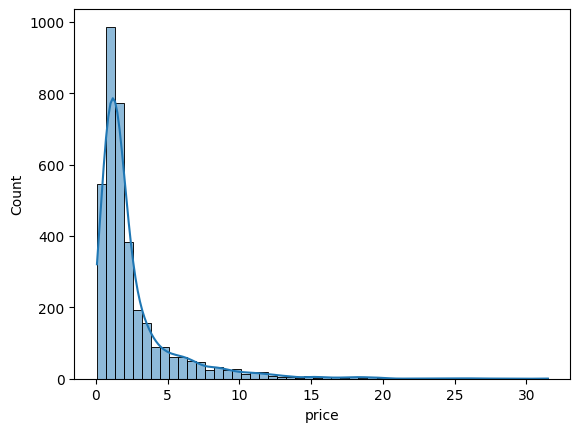

In [18]:
sns.histplot(df['price'], kde=True, bins=50)

we can see it is right-skewed distribution

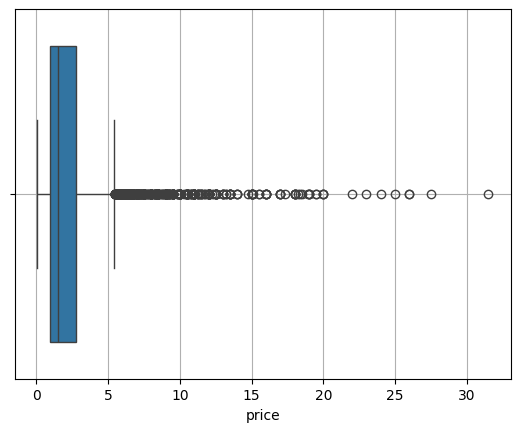

In [19]:
sns.boxplot(x=df['price'])
plt.grid()

**Observations**
- visulizations show that it's right-skewed, which means most houses are <5cr and few go beyond 10cr.
- box plot showcase that properties > 10 cr. might considered as outliers and they are the once who is affecting the distribution quite much.
- 17 missing values

In [20]:
skewness = df['price'].skew() # tells about the asymmetry of the distribution
kurtosis = df['price'].kurt() # tells about the heaviness of the tails, effect of outliers

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 3.279720450862381
Kurtosis: 14.938219216313124


In [21]:
df['price'].quantile([.01, .05, .95, .99])

0.01     0.25
0.05     0.37
0.95     8.50
0.99    15.26
Name: price, dtype: float64

In [22]:
# performing interquartile range (IQR) method to remove outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
IQR

np.float64(1.8)

In [23]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")    

Lower Bound: -1.7500000000000002
Upper Bound: 5.45


In [24]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 24)

In [25]:
# count of outliers is pretty high, can't drop them
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

*need to handle this properly because it's hard to handle this much outliers and we can't directly remove them because it will decrease the variability in data*

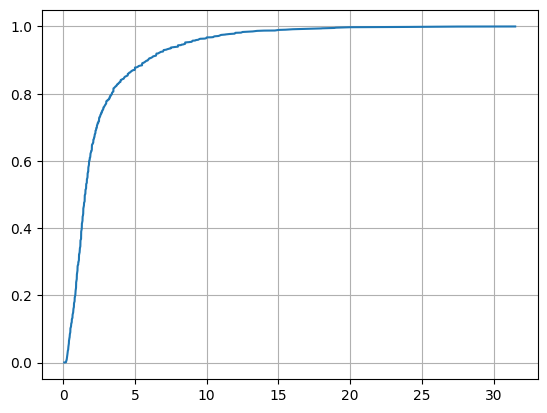

In [26]:
# ecdf data - tells how much data is below a certain value
ecdf = df['price'].value_counts().sort_index().cumsum() / df['price'].count()
plt.plot(ecdf.index, ecdf)
plt.grid()

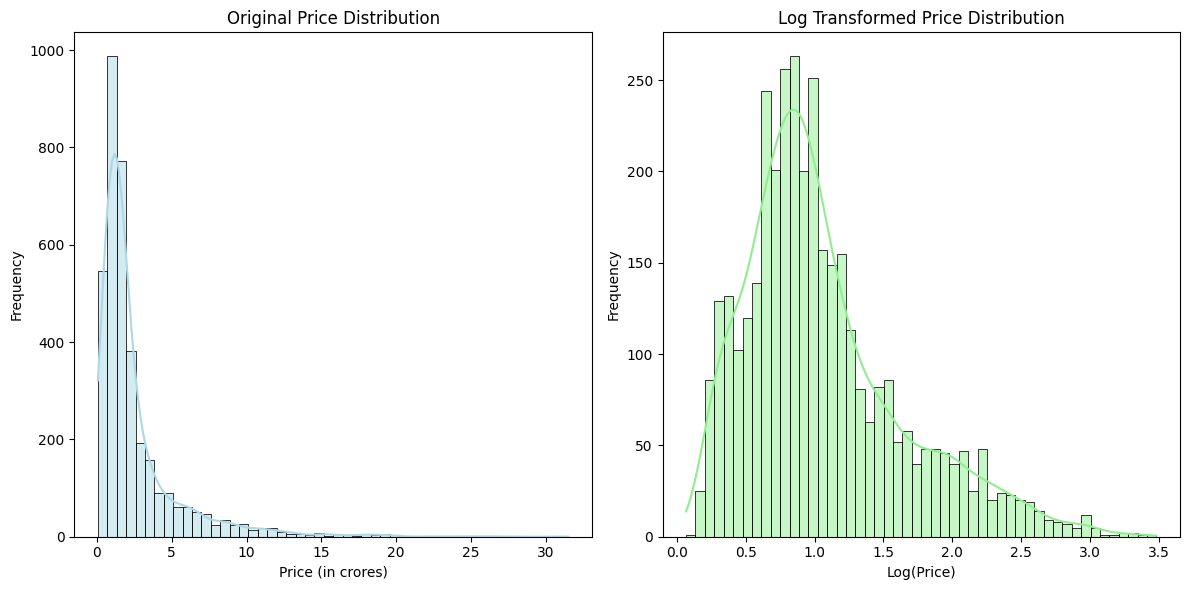

In [27]:
plt.figure(figsize=(12, 6))

# without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='lightblue')
plt.title('Original Price Distribution')
plt.xlabel("Price (in crores)")
plt.ylabel("Frequency")

# performing log transformation on price
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen') # applied log1p to avoid negative values
plt.title('Log Transformed Price Distribution')
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

we can see skewness decreased

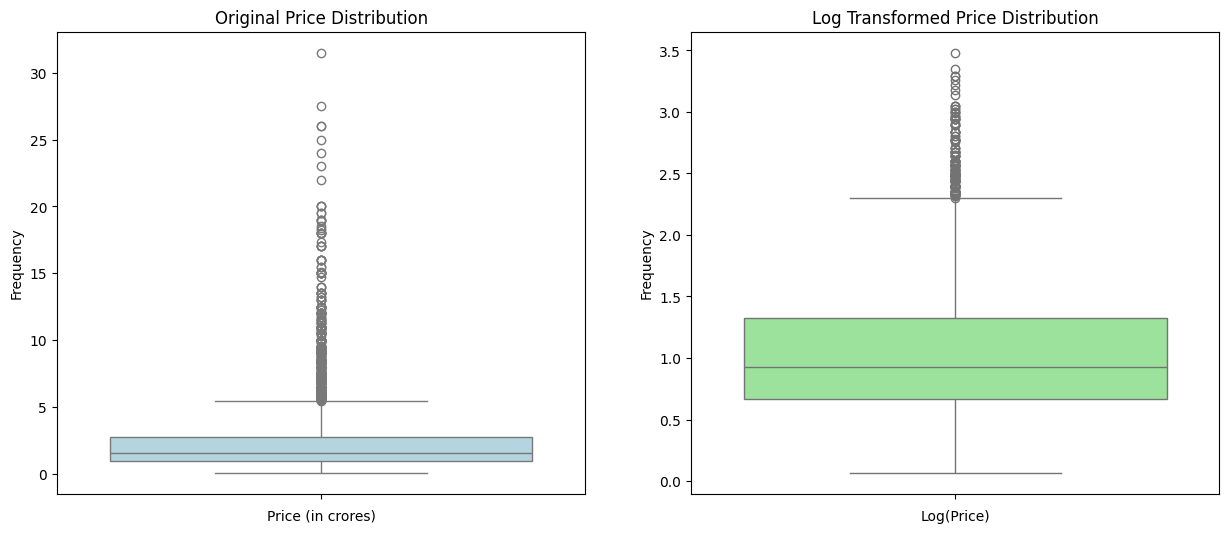

In [28]:
plt.figure(figsize=(15, 6))

# without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='lightblue')
plt.title('Original Price Distribution')
plt.xlabel("Price (in crores)")
plt.ylabel("Frequency")

# performing log transformation on price
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Log Transformed Price Distribution')
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

plt.show()

after transformation, range increased and outliers decreased

#### price_per_sqft

In [29]:
df['price_per_sqft'].describe()

count      3661.000000
mean      13891.021852
std       23207.110020
min           4.000000
25%        6818.000000
50%        9020.000000
75%       13878.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

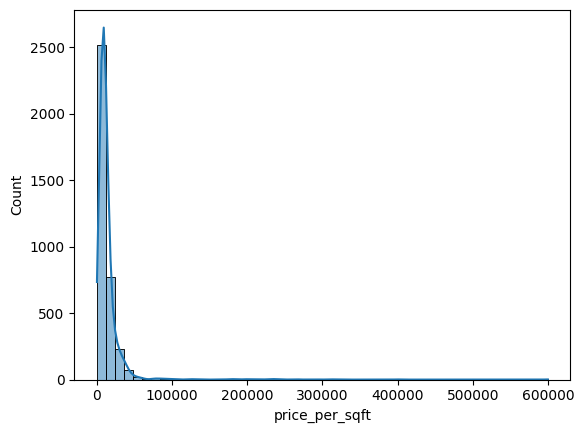

In [30]:
sns.histplot(df['price_per_sqft'], kde=True, bins=50)

Data doesn't seem correct, very much right skewed with very much variability

<Axes: xlabel='price_per_sqft'>

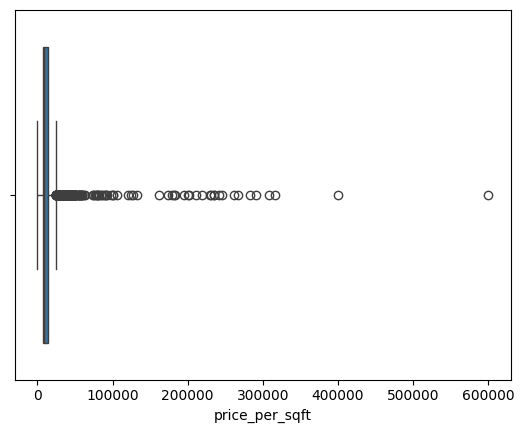

In [31]:
sns.boxplot(x=df['price_per_sqft'])

**Observations**
- confirmed outliers, need to be removed
- very right skewed

#### bedroom

In [32]:
# no null values
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

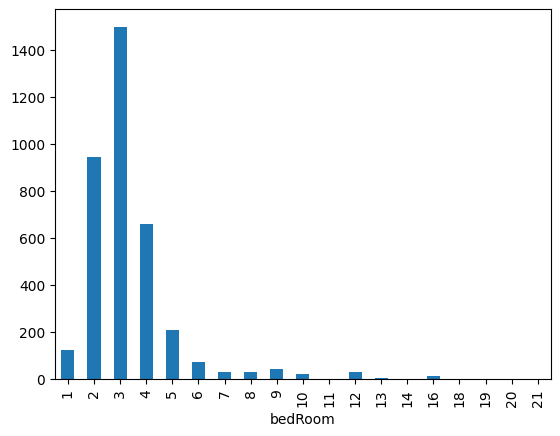

In [33]:
# distribution
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

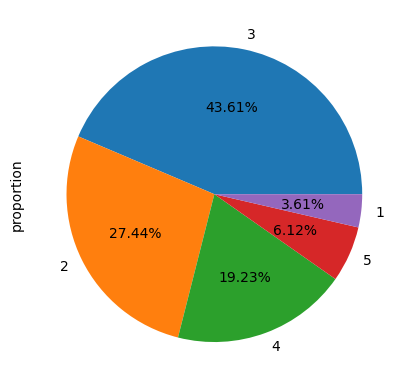

In [34]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

#### bathRoom

In [35]:
df['bathroom'].isnull().sum()  

np.int64(0)

<Axes: xlabel='bathroom'>

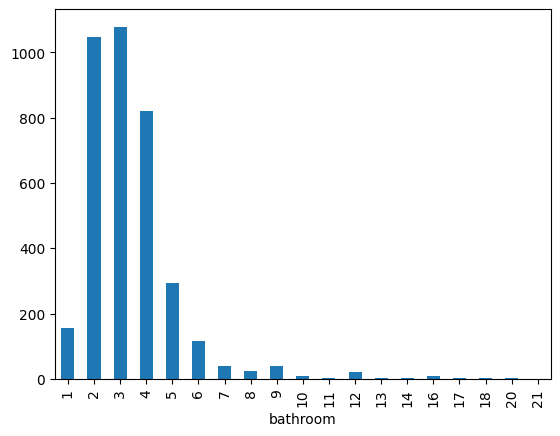

In [36]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

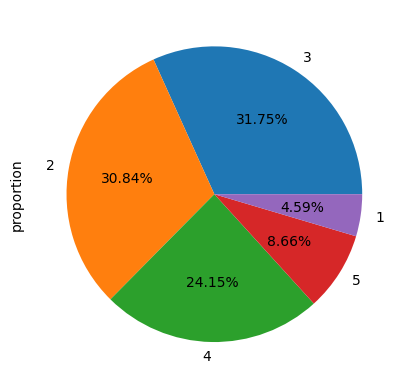

In [37]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

#### balcony

In [38]:
df['balcony'].isnull().sum()

np.int64(0)

<Axes: xlabel='balcony'>

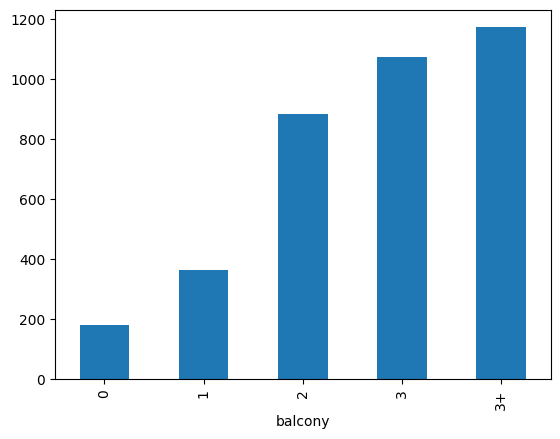

In [39]:
df['balcony'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

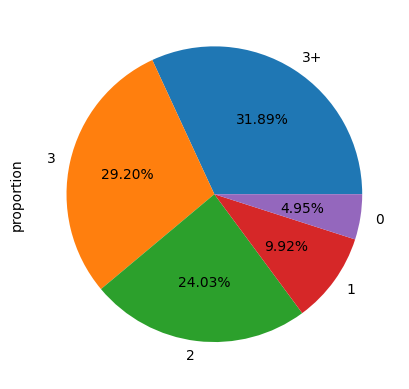

In [40]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

#### floornum

In [41]:
df['floorNum'].isnull().sum()   

np.int64(19)

In [42]:
df['floorNum'].describe()

count    3659.000000
mean        6.798032
std         6.011647
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

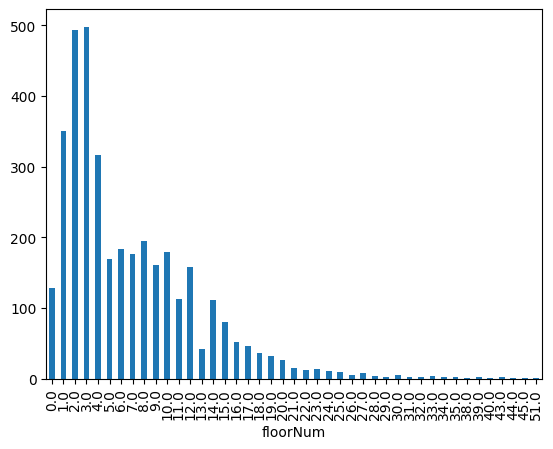

In [43]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

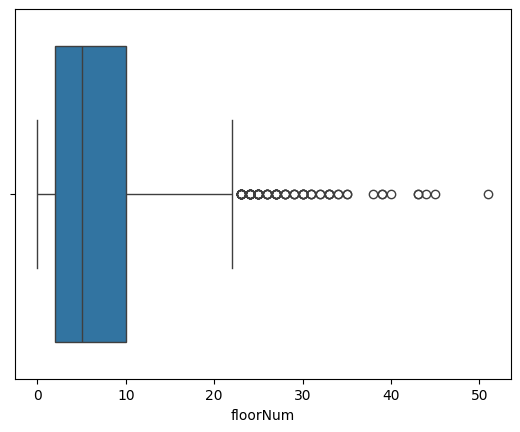

In [44]:
sns.boxplot(x=df['floorNum'])

**Observations**
- range = {0, 20}
- majority = {1, 4}
- presence of outliers

#### facing

In [45]:
# in india, this feature is one of the most important feature
df['facing'].isnull().sum() 

np.int64(1045)

In [46]:
# many missing values, so can't be dependent on this feature. Filling them with NA
df['facing'].fillna('NA', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_23388\3642661430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA', inplace=True)


In [47]:
df['facing'].value_counts()

facing
NA            1045
East           623
North-East     623
North          388
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

#### agePossession

In [48]:
df['agePossession'].isnull().sum() 

np.int64(0)

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           304
Under Construction     266
Name: count, dtype: int64

#### areas

In [50]:
# super builtup area
df['super_builtup_area'].isnull().sum()

np.int64(1802)

In [51]:
df['super_builtup_area'].describe()

count     1876.000000
mean      1925.159861
std        763.975853
min         89.000000
25%       1479.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_builtup_area, dtype: float64

<Axes: xlabel='super_builtup_area', ylabel='Count'>

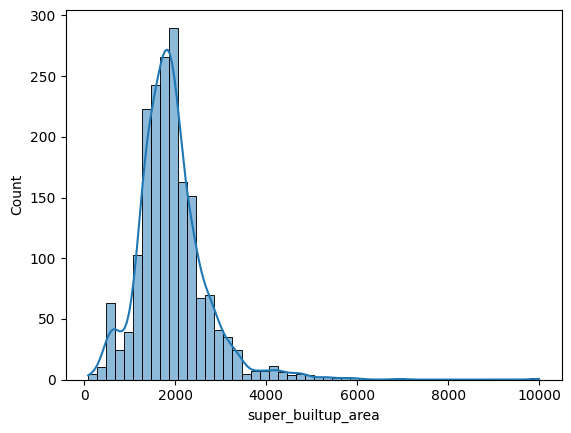

In [52]:
sns.histplot(df['super_builtup_area'].dropna(), kde=True, bins=50)

<Axes: ylabel='super_builtup_area'>

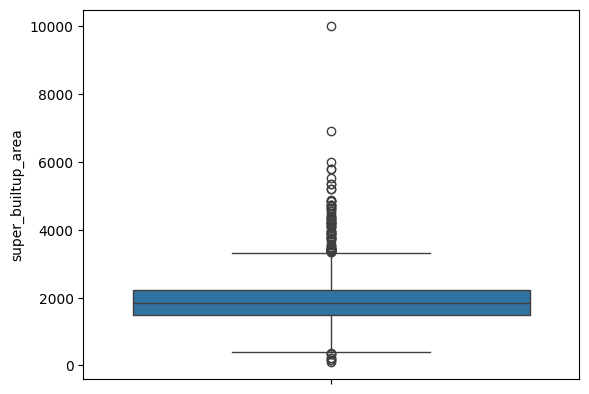

In [53]:
sns.boxplot(df['super_builtup_area'].dropna())

In [54]:
# builtup area
df['builtup_area'].isnull().sum()

np.int64(1988)

In [55]:
df['builtup_area'].describe()

count      1690.000000
mean       2379.665975
std       17942.894281
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: builtup_area, dtype: float64

<Axes: xlabel='builtup_area', ylabel='Count'>

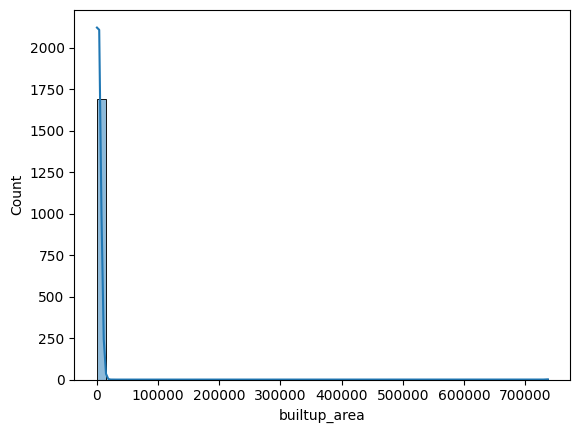

In [57]:
sns.histplot(df['builtup_area'].dropna(), kde=True, bins=50)

**Observations**
- outlier presence affecting distribution

#### additional rooms

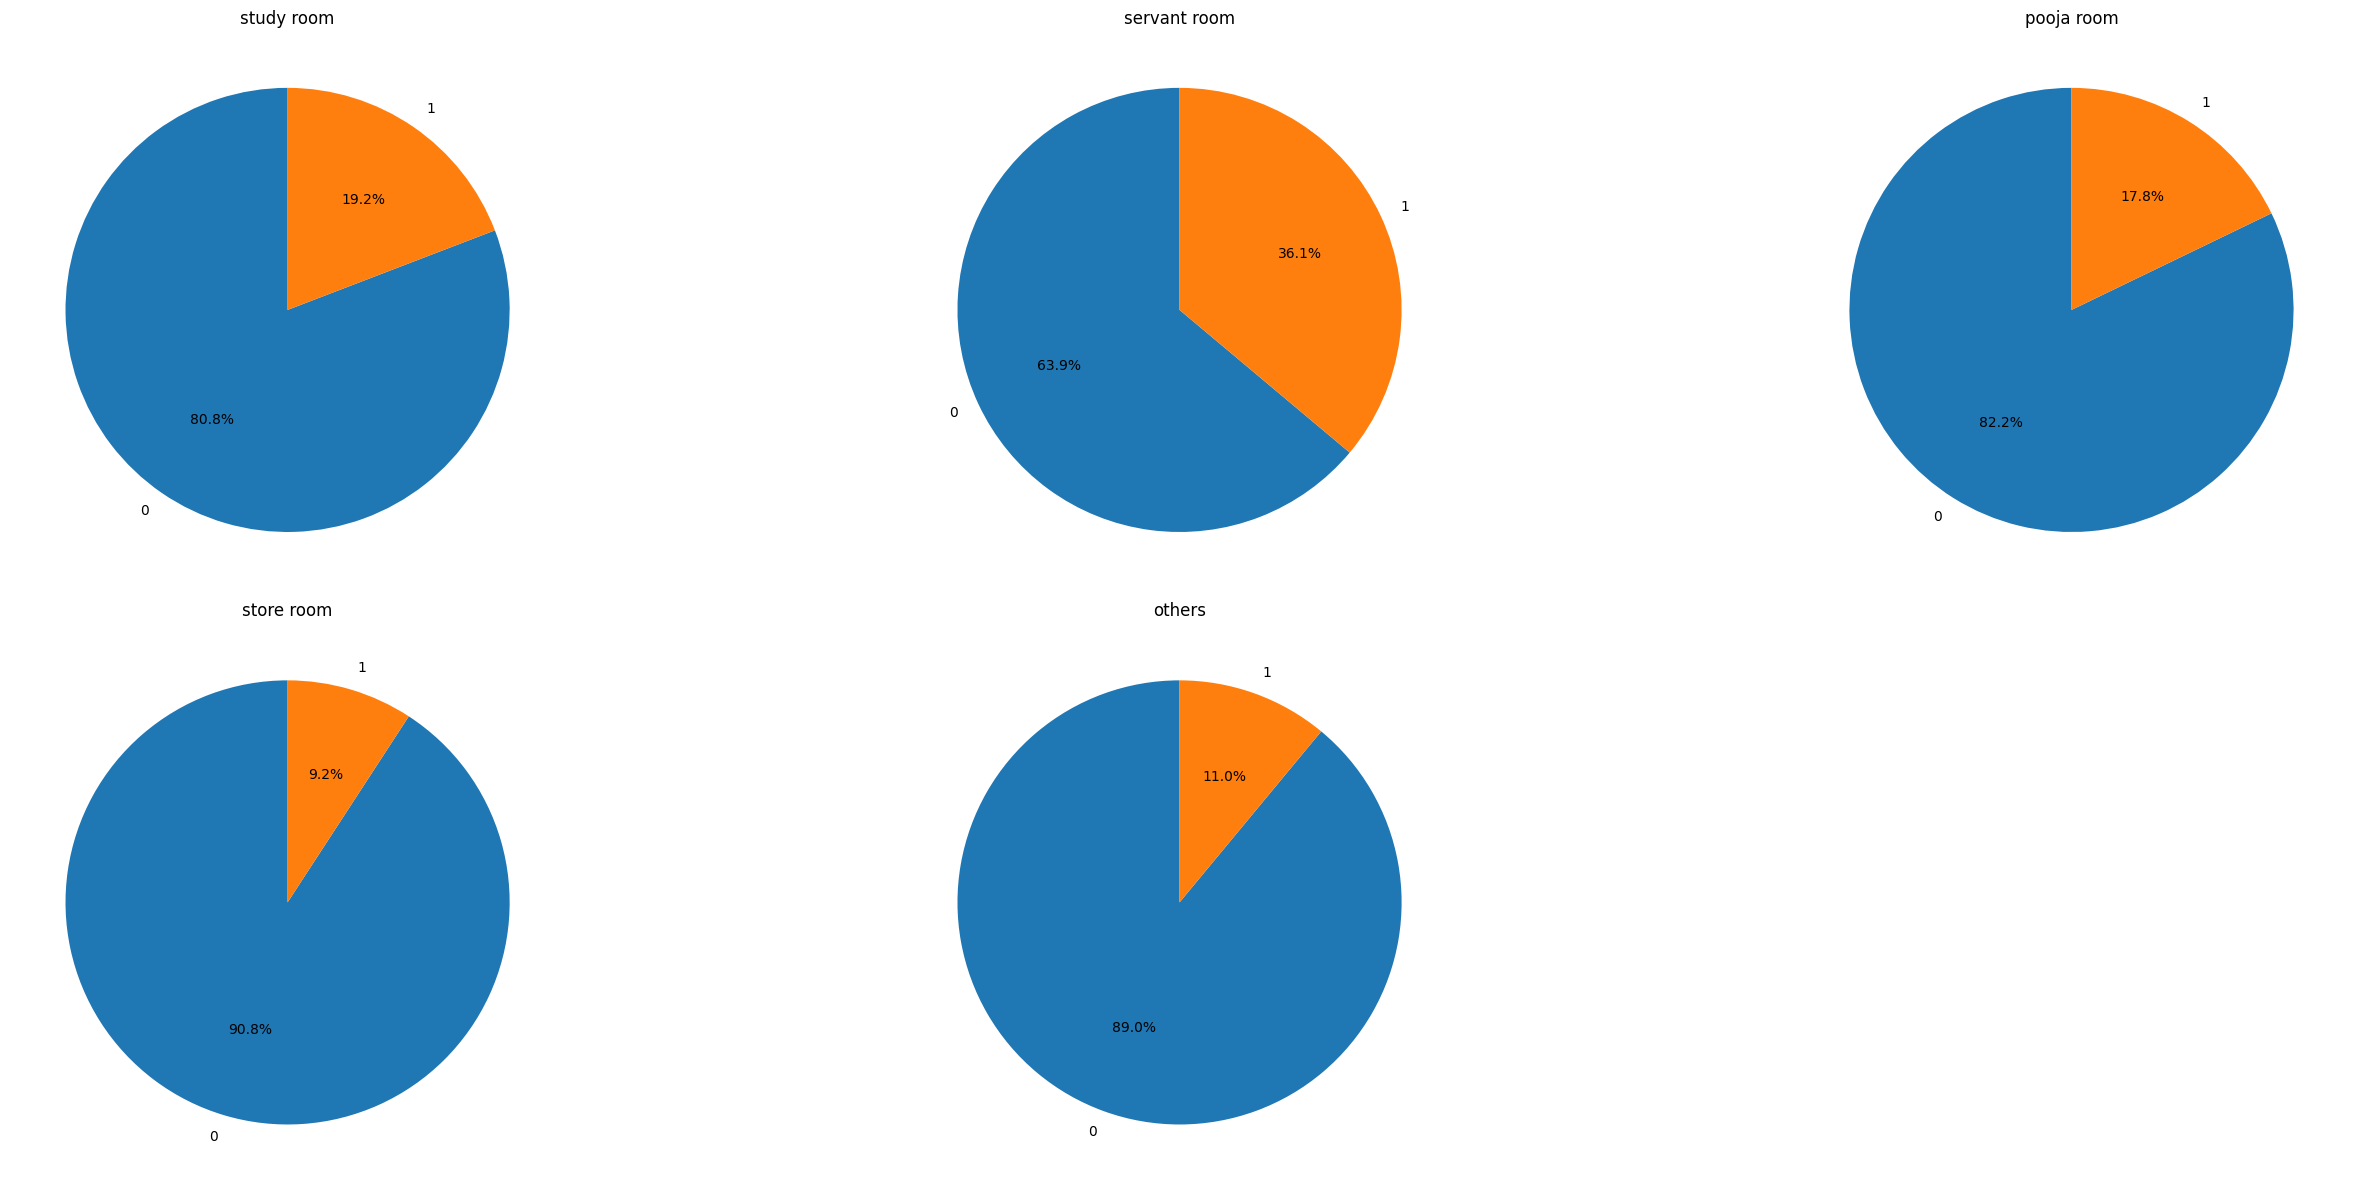

In [58]:
plt.figure(figsize=(28, 12))

for index, room in enumerate(['study room', 'servant room', 'pooja room', 'store room', 'others'], 1):
    ax = plt.subplot(2, 3, index)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
    plt.title(room)
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### furnishing type

In [59]:
df['furnishing_type'].value_counts()

furnishing_type
0    2436
2    1038
1     204
Name: count, dtype: int64

<Axes: ylabel='count'>

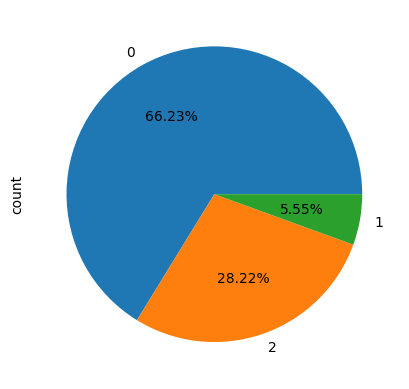

In [60]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

#### facility score

In [61]:
df['facility_score'].isnull().sum()

np.int64(0)

In [62]:
df['facility_score'].describe()

count    3678.000000
mean       71.522567
std        53.055094
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: facility_score, dtype: float64

<Axes: xlabel='facility_score', ylabel='Count'>

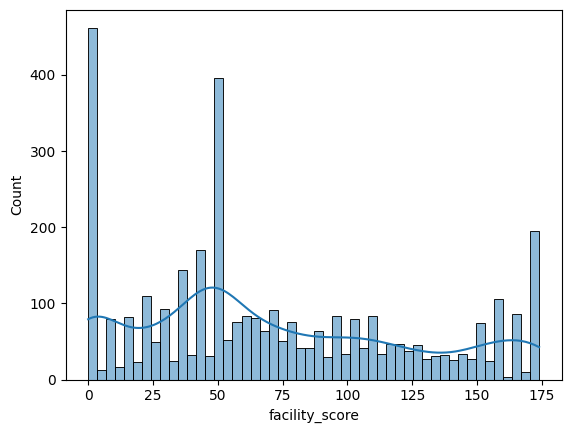

In [63]:
sns.histplot(df['facility_score'], kde=True, bins=50)